<a href="https://colab.research.google.com/github/AlketaAlia123/Computer_Vision_Exercises/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: IMAGE SEGMENTATION

Christian Mata, PhD

# Exercise 2

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

🔹 **Task 1:** Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

🔹 **Task 2:** Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

🔹 **Task 3:** Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

🔹 **Task 4:** Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.


**SOLUTION OF TASK 1**

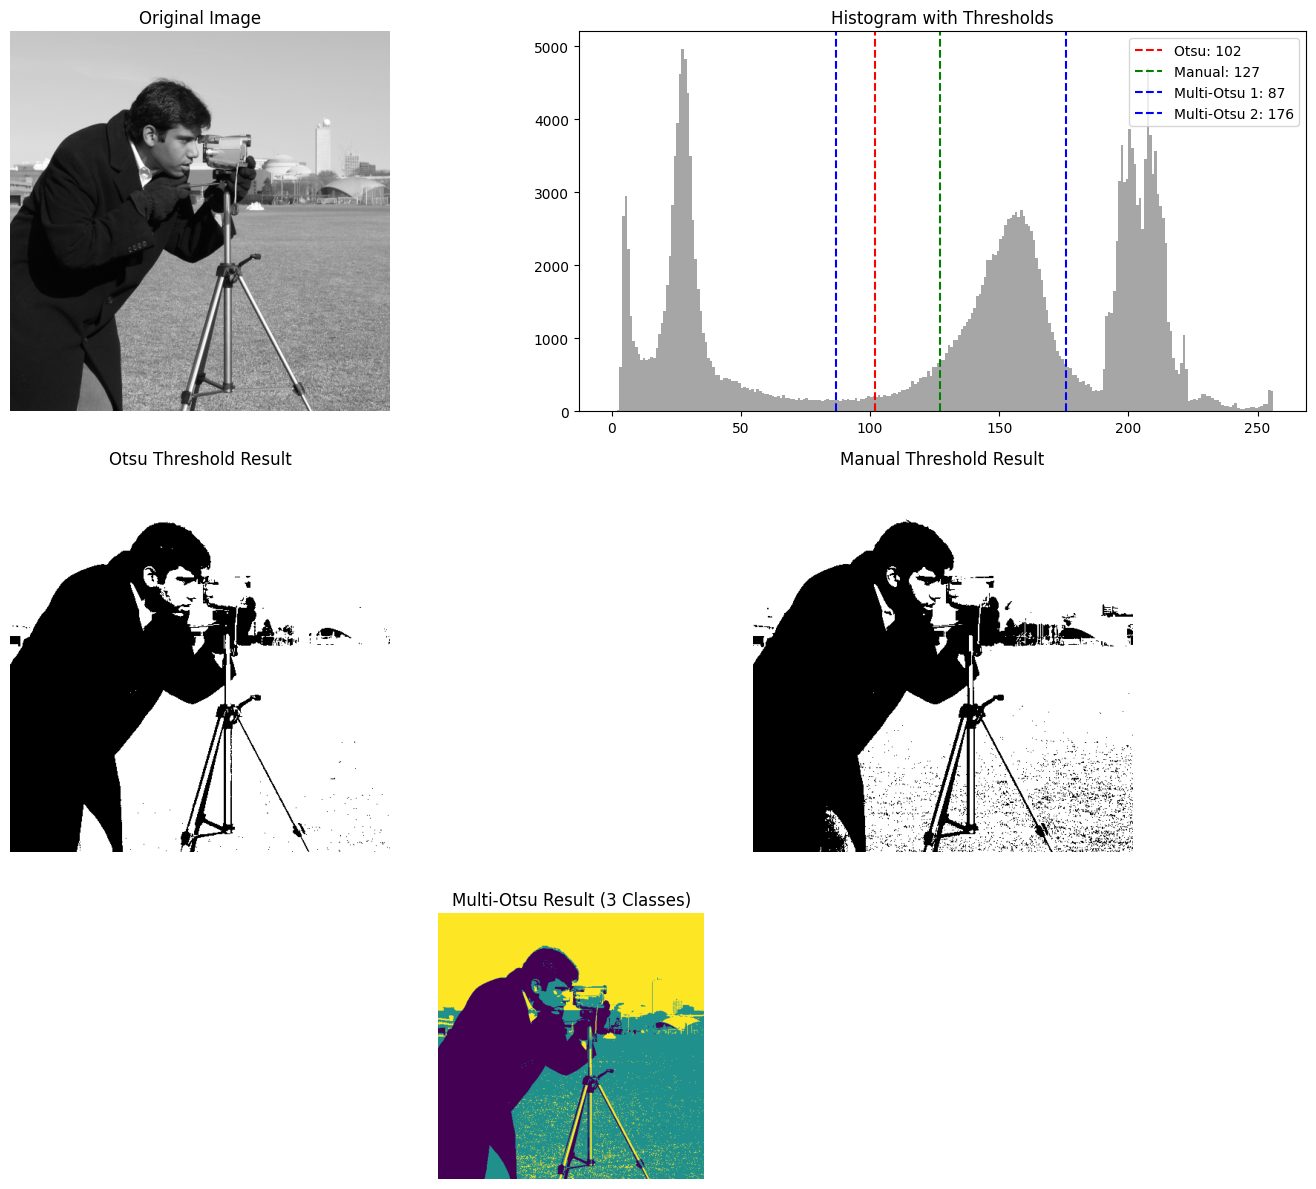

Otsu threshold: 102
Manual threshold: 127
Multi-Otsu thresholds: [ 87 176]

Segment distribution:
Otsu - Foreground: 67.90%, Background: 32.10%
Manual - Foreground: 64.30%, Background: 35.70%
Multi-Otsu - Region 0: 31.06%
Multi-Otsu - Region 1: 36.02%
Multi-Otsu - Region 2: 32.92%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_multiotsu
from matplotlib import gridspec

# Load an example image
image = data.camera()  # Using the camera image from scikit-image

# Apply Otsu's method for single threshold
thresh_otsu = threshold_otsu(image)
binary_otsu = image > thresh_otsu

# Apply multi-Otsu thresholding (3 classes)
thresholds_multi = threshold_multiotsu(image, classes=3)
# Using the thresholds to create multiple regions
regions_multi = np.digitize(image, bins=thresholds_multi)

# Apply a simple manual threshold
thresh_manual = 127  # Mid-point in grayscale range (0-255)
binary_manual = image > thresh_manual

# Create a figure to display the results
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 0.7])

# Original image
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(image, cmap='gray')
ax0.set_title('Original Image')
ax0.axis('off')

# Histogram with thresholds
ax1 = fig.add_subplot(gs[0, 1])
ax1.hist(image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax1.axvline(thresh_otsu, color='r', linestyle='--', label=f'Otsu: {thresh_otsu}')
ax1.axvline(thresh_manual, color='g', linestyle='--', label=f'Manual: {thresh_manual}')
for i, thresh in enumerate(thresholds_multi):
    ax1.axvline(thresh, color='b', linestyle='--', label=f'Multi-Otsu {i+1}: {thresh}')
ax1.set_title('Histogram with Thresholds')
ax1.legend()

# Otsu result
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(binary_otsu, cmap='gray')
ax2.set_title('Otsu Threshold Result')
ax2.axis('off')

# Manual threshold result
ax3 = fig.add_subplot(gs[1, 1])
ax3.imshow(binary_manual, cmap='gray')
ax3.set_title('Manual Threshold Result')
ax3.axis('off')

# Multi-Otsu result
ax4 = fig.add_subplot(gs[2, :])
ax4.imshow(regions_multi, cmap='viridis')
ax4.set_title('Multi-Otsu Result (3 Classes)')
ax4.axis('off')

plt.tight_layout()
plt.show()

# Print threshold values for reference
print(f"Otsu threshold: {thresh_otsu}")
print(f"Manual threshold: {thresh_manual}")
print(f"Multi-Otsu thresholds: {thresholds_multi}")

# Calculate percentage of pixels in each segment
print("\nSegment distribution:")
print(f"Otsu - Foreground: {np.sum(binary_otsu)/binary_otsu.size:.2%}, Background: {np.sum(~binary_otsu)/binary_otsu.size:.2%}")
print(f"Manual - Foreground: {np.sum(binary_manual)/binary_manual.size:.2%}, Background: {np.sum(~binary_manual)/binary_manual.size:.2%}")

for i in range(3):
    segment_pct = np.sum(regions_multi == i) / regions_multi.size
    print(f"Multi-Otsu - Region {i}: {segment_pct:.2%}")

**TASK 2 EXPLANATION OF THE RESULTS**
Analysis of Image Segmentation Results
Histogram Analysis
The histogram of the camera image reveals several interesting characteristics:

The image has a multimodal distribution with distinct peaks around pixel values 20, 30-40, 140-180, and 200-220
This multimodal distribution indicates the image contains several distinct brightness regions rather than a simple bimodal foreground/background separation
The valleys between these peaks represent transitions between different regions in the image

Threshold Placements
Four thresholds were applied to the image:

Otsu threshold (102): Positioned in the large valley between the darker and lighter regions
Manual threshold (127): Set slightly higher than Otsu's threshold
Multi-Otsu 1 (87): Positioned to separate the darkest regions (person's suit) from mid-dark tones
Multi-Otsu 2 (176): Positioned to separate mid-tones from the brightest regions (sky)

Segmentation Results Analysis
Otsu Threshold Result (T=102)
The Otsu method effectively segments:

The person and tripod as foreground (black)
The background sky and most of the field as background (white)

Otsu's method works well here because:

It automatically identified the significant valley in the histogram (T=102)
It successfully separated the primary subject (person) from the environment
The threshold respects the natural intensity boundaries in the image

However, some details are lost:

Some parts of the distant background objects are merged with the foreground
Texture in dark regions is completely eliminated

Manual Threshold Result (T=127)
The manual threshold at 127 shows:

Similar results to Otsu but with more background pixels classified as foreground
The field area shows more noise/texture due to the higher threshold
Less clean separation between subject and background

The slightly higher manual threshold:

Preserves more detail in mid-tone regions
Introduces more noise in the segmentation
Makes the boundary between foreground and background less distinct

Multi-Otsu Result (3 Classes, T₁=87, T₂=176)
The multi-Otsu approach provides a more nuanced segmentation:

Dark region (purple): Primarily the person and tripod
Mid-tone region (teal): The field and some background elements
Bright region (yellow): The sky and brightest parts of the image

This approach:

Preserves more information from the original image
Reflects the natural clustering of intensities shown in the histogram
Creates semantically meaningful segments (person, field, sky)
Better represents the actual scene structure than binary segmentation

Comparative Assessment

Otsu vs. Manual Thresholding:

The small difference between Otsu (102) and manual (127) thresholds results in visible differences in segmentation quality
Otsu provides a cleaner separation of the main subject
The manual threshold preserves more texture in mid-tone areas but at the cost of clarity


Binary vs. Multi-class Segmentation:

Binary segmentation (Otsu, manual) clearly distinguishes the main subject but loses all gradation
Multi-Otsu preserves the hierarchical structure of the scene (person, field, sky)
The three-class approach better represents the multimodal nature of the image histogram


Segmentation Quality:

All methods successfully isolate the main subject (person with camera)
The choice between methods depends on the application:

For simple subject extraction: Otsu is most effective
For scene understanding: Multi-Otsu provides better contextual information
For texture preservation: Higher thresholds (manual) retain more detail in mid-tones





The results demonstrate how histogram analysis can guide effective image segmentation, with different thresholding approaches offering various trade-offs between simplicity, accuracy, and information preservation.

SOLUTION OF TASK 2

K=2, Silhouette Score: 0.5927
K=3, Silhouette Score: 0.5783
K=5, Silhouette Score: 0.5436
K=8, Silhouette Score: 0.5096


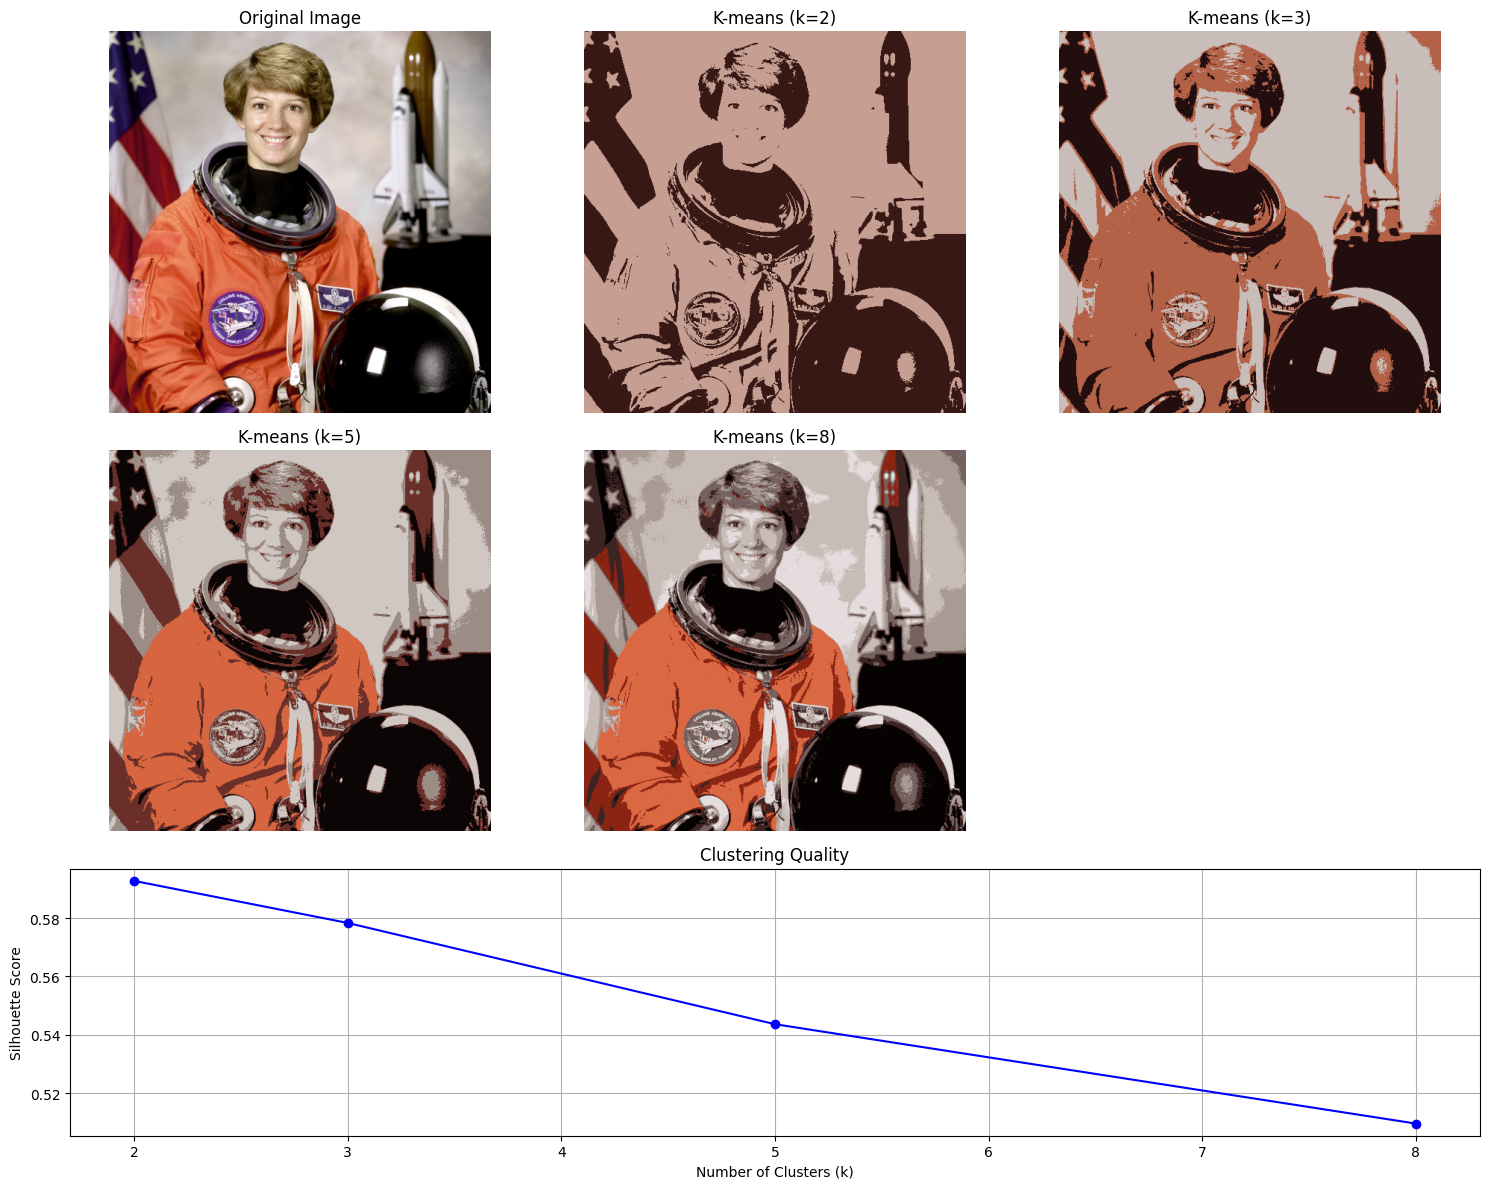

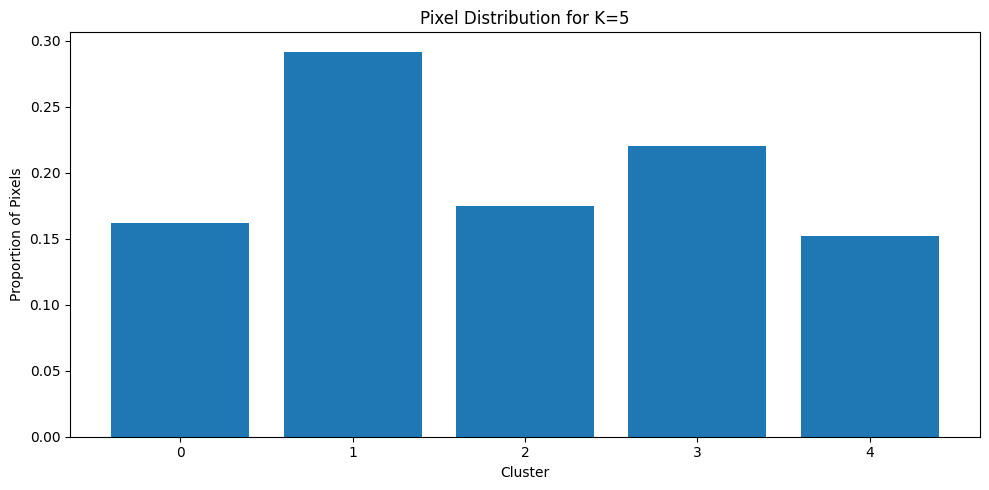

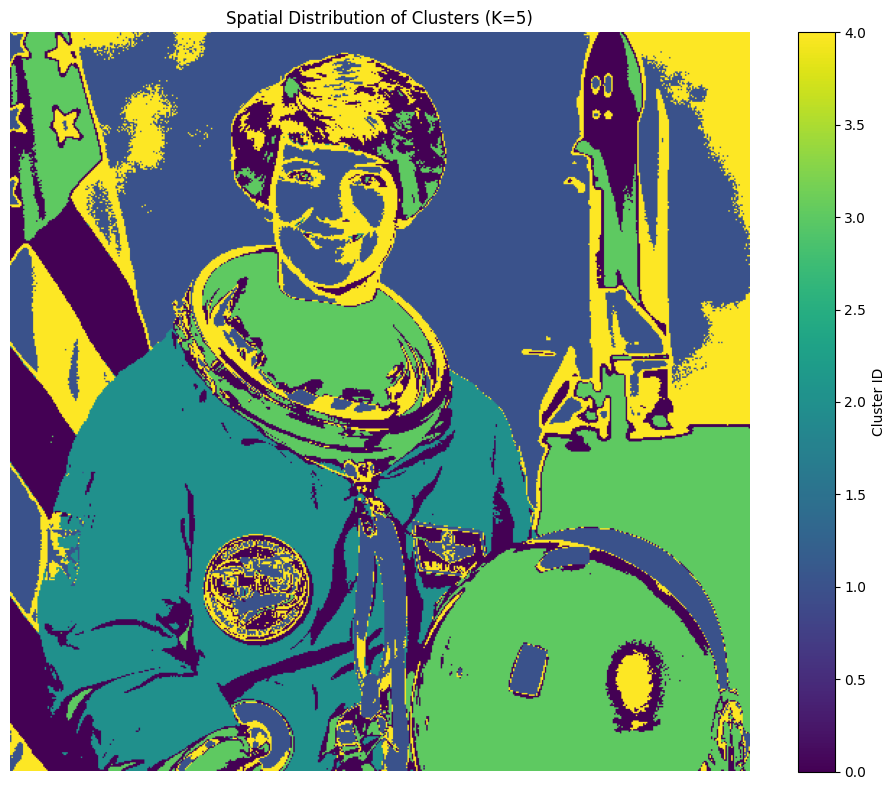

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import gridspec

# Load an example image
image = data.astronaut()  # Using the astronaut image which has rich colors
image_rgb = color.rgba2rgb(image) if image.shape[2] == 4 else image  # Ensure RGB format

# Reshape the image for clustering
rows, cols, channels = image_rgb.shape
reshaped_image = image_rgb.reshape(rows * cols, channels)

# Apply K-means clustering with different k values
k_values = [2, 3, 5, 8]
segmented_images = []
silhouette_scores = []

for k in k_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reshaped_image)

    # Convert labels to segmented image
    segmented_flat = kmeans.cluster_centers_[labels]
    segmented_image = segmented_flat.reshape(rows, cols, channels)
    segmented_images.append(segmented_image)

    # Calculate silhouette score if k > 1
    if k > 1:
        try:
            # Sample a subset of pixels to make silhouette calculation faster
            sample_indices = np.random.choice(len(reshaped_image), min(10000, len(reshaped_image)), replace=False)
            score = silhouette_score(reshaped_image[sample_indices], labels[sample_indices], sample_size=None)
            silhouette_scores.append(score)
            print(f"K={k}, Silhouette Score: {score:.4f}")
        except:
            silhouette_scores.append(None)
            print(f"K={k}, Silhouette Score calculation failed")

# Create a figure to display the results
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 0.7])

# Original image
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(image_rgb)
ax0.set_title('Original Image')
ax0.axis('off')

# Segmented images
for i, (k, segmented) in enumerate(zip(k_values, segmented_images)):
    row = (i + 1) // 3
    col = (i + 1) % 3
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(segmented.astype(np.uint8))  # Convert to uint8 to avoid warnings
    ax.set_title(f'K-means (k={k})')
    ax.axis('off')

# Plot silhouette scores
if len(silhouette_scores) > 0:
    ax_sil = fig.add_subplot(gs[2, :])
    # Make sure we're plotting exactly what we have
    ax_sil.plot(k_values, silhouette_scores, 'bo-')
    ax_sil.set_xlabel('Number of Clusters (k)')
    ax_sil.set_ylabel('Silhouette Score')
    ax_sil.set_title('Clustering Quality')
    ax_sil.grid(True)

plt.tight_layout()
plt.show()

# Show the distribution of pixels in each cluster for the best k
# For this example, let's use k=5
k_index = k_values.index(5)
kmeans = KMeans(n_clusters=k_values[k_index], random_state=42, n_init=10)
labels = kmeans.fit_predict(reshaped_image)

fig, ax = plt.subplots(figsize=(10, 5))
unique_labels, counts = np.unique(labels, return_counts=True)
ax.bar(unique_labels, counts / sum(counts))
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion of Pixels')
ax.set_title(f'Pixel Distribution for K={k_values[k_index]}')
plt.tight_layout()
plt.show()

# Finally, let's visualize the clusters spatially
clustered_image = np.zeros((rows, cols))
for i, label in enumerate(labels):
    clustered_image[i // cols, i % cols] = label

plt.figure(figsize=(10, 8))
plt.imshow(clustered_image, cmap='viridis')
plt.title(f'Spatial Distribution of Clusters (K={k_values[k_index]})')
plt.colorbar(label='Cluster ID')
plt.axis('off')
plt.tight_layout()
plt.show()

**TASK 3 EXPLANATION OF THE RESULTS**
Analysis and Evaluation of K-means Segmentation Results
Spatial Distribution of Clusters (K=5)
The spatial distribution map (Image 1) reveals how the astronaut image is partitioned into 5 distinct color-based segments:

Dark Purple (Cluster 0): Represents the darkest regions, including the black helmet, dark parts of the NASA insignia, and shadows.
Blue (Cluster 1): Captures medium-dark regions including parts of the background, some shadow areas on the spacesuit, and hair details.
Teal (Cluster 2): Corresponds to the main body of the orange spacesuit, showing how K-means has assigned a unique cluster to this prominent feature.
Green (Cluster 3): Represents mid-tone regions including parts of the background, American flag, and helmet reflections.
Yellow (Cluster 4): Captures the brightest areas including the astronaut's face, highlights on the spacesuit, and bright background elements.

The segmentation successfully identifies major components of the image, with clear delineation between the astronaut, equipment, and background. However, some "salt and pepper" noise is visible where isolated pixels are assigned to different clusters than their surroundings.
Effect of Varying K Values (Image 2 & 4)
The progression from K=2 to K=8 shows the trade-off between simplicity and detail:
K=2

Creates a basic binary segmentation in beige/brown tones
Primarily separates darker elements (helmet, background) from lighter elements (face, spacesuit)
Loses significant color information but achieves the highest silhouette score (0.59)
Creates a simplified representation with clear boundaries

K=3

Introduces a third color tone, allowing better differentiation of the orange spacesuit
Begins to distinguish face, suit, and dark elements as separate regions
Maintains a good silhouette score (0.58)
Provides a significant improvement in visual quality over K=2

K=5

Offers a more detailed segmentation with reasonable color fidelity
Clearly differentiates the astronaut's face, orange spacesuit, NASA insignia, and background elements
Shows moderate decrease in silhouette score (0.54)
Represents a good balance between detail and cluster coherence

K=8

Provides the most detailed segmentation, approaching the original image quality
Captures subtle variations in tone and color
Shows the lowest silhouette score (0.51)
The marginal visual improvement from K=5 to K=8 is less significant than earlier transitions

Cluster Distribution Analysis
The pixel distribution chart for K=5 shows:

Cluster 1 contains the highest proportion of pixels (~29%), likely representing the dominant mid-tone regions
Cluster 3 contains the second highest proportion (~22%)
The remaining clusters (0, 2, and 4) have fairly balanced distributions (15-17% each)

This relatively even distribution indicates a good segmentation where each cluster represents a significant portion of the image. There is no single overwhelmingly dominant cluster, suggesting K=5 provides a reasonable partitioning of the color space.
Silhouette Score Analysis (Images 2 & 4)
The silhouette score graph shows a clear downward trend as K increases:

K=2: 0.59 (highest)
K=3: 0.58
K=5: 0.54
K=8: 0.51 (lowest)

This decline indicates that:

The clusters become less distinct and more overlapping as K increases
The natural clustering tendency of the image favors fewer segments
Additional clusters increasingly subdivide what might be naturally unified regions

Overall Evaluation
Strengths of the K-means Segmentation:

Semantic Alignment: Despite being purely color-based, the segmentation aligns well with semantic elements (face, suit, background).
Progressive Detail: Each increase in K adds meaningful detail to the segmentation.
Spatial Coherence: Despite not considering spatial information, the clusters form relatively coherent spatial regions.
Balance: The pixel distribution shows good balance between clusters for K=5.

Limitations:

Lack of Edge Awareness: K-means doesn't consider edges, resulting in some boundary imprecision.
Noise Susceptibility: The spatial distribution shows scattered pixels assigned to clusters different from their neighbors.
Color-Only Limitation: The segmentation is based solely on color similarity, ignoring spatial proximity and texture.
Diminishing Returns: The visual improvement becomes marginal beyond K=5 while the silhouette score continues to decline.

Conclusion
For the astronaut image, K=5 represents an optimal balance between segmentation detail and cluster quality. While K=2 has the highest silhouette score, it lacks sufficient detail to distinguish important image components. K=8 offers marginally better visual detail but with lower cluster coherence.
The effectiveness of K-means for this image stems from the distinct color regions that naturally align with semantic elements. However, for images with less distinct color boundaries or more complex textures, the limitations of K-means would become more apparent, potentially requiring more sophisticated approaches that incorporate spatial and textural information.

**SOLUTION OF TASK 3**

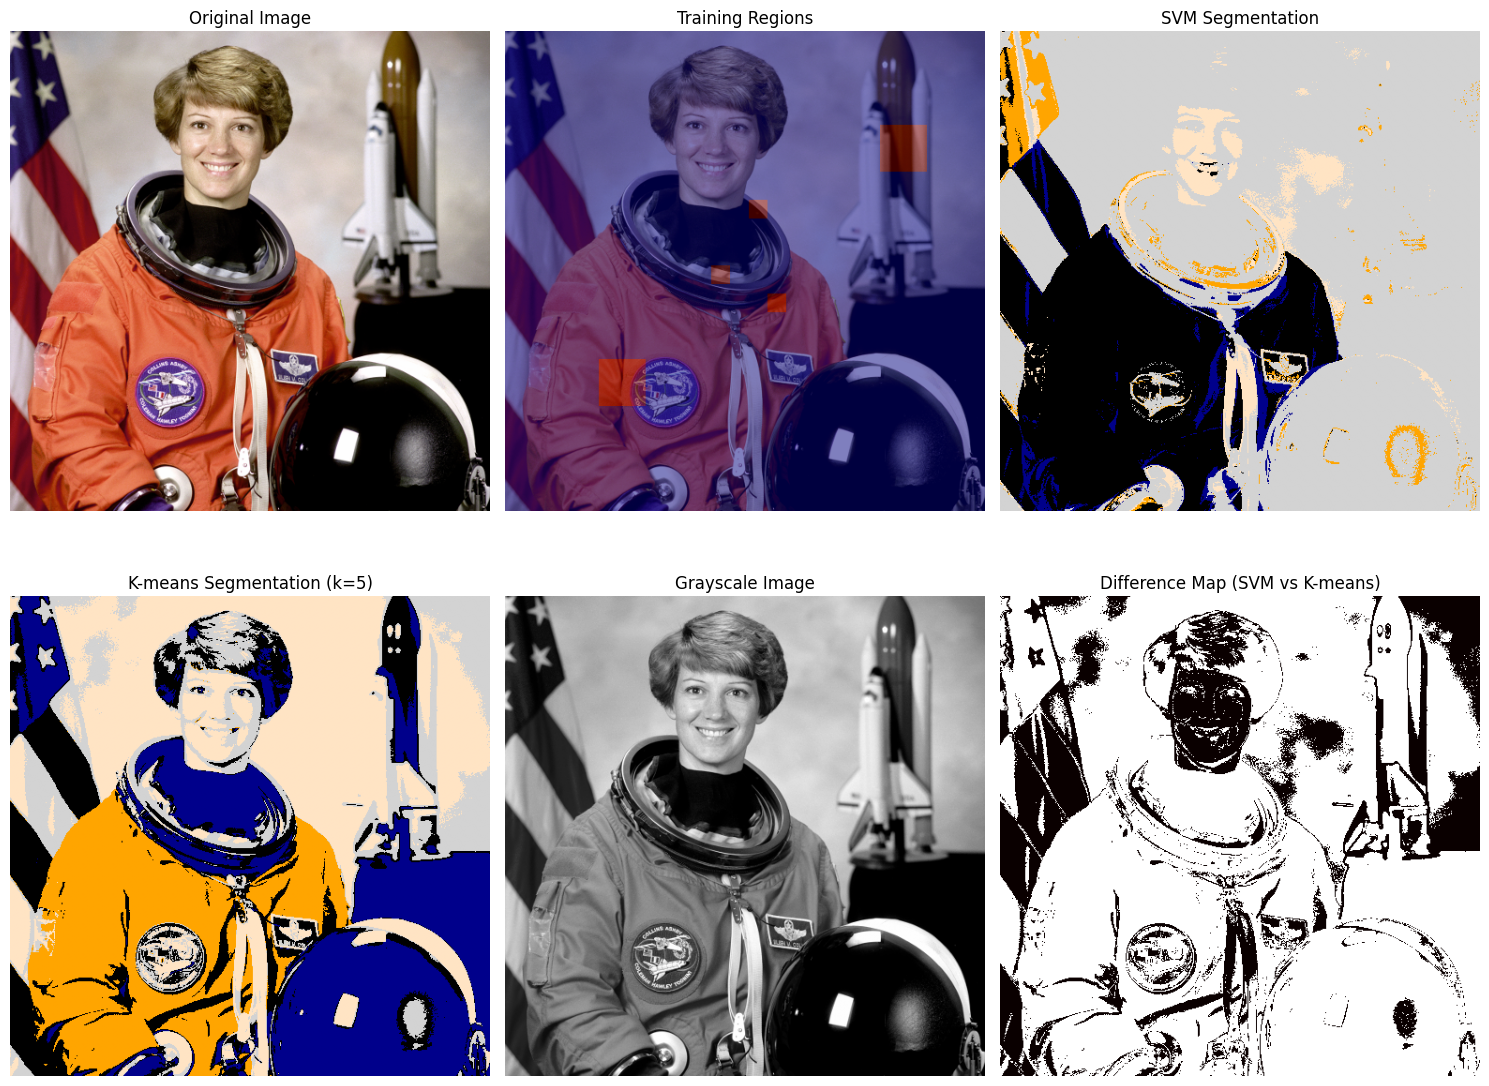

Agreement between SVM and K-means: 24.33%

Classification Report on Test Regions:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        25
           1       1.00      0.40      0.57        25
           2       0.69      0.44      0.54        25
           3       1.00      0.48      0.65        25
           4       0.51      1.00      0.68        25

    accuracy                           0.66       125
   macro avg       0.77      0.66      0.65       125
weighted avg       0.77      0.66      0.65       125


Confusion Matrix on Test Regions:
[[25  0  0  0  0]
 [ 0 10  5  0 10]
 [ 0  0 11  0 14]
 [13  0  0 12  0]
 [ 0  0  0  0 25]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage import data, color
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the astronaut image
image = data.astronaut()
image_rgb = color.rgba2rgb(image) if image.shape[2] == 4 else image

# Convert to grayscale for visualization purposes
image_gray = color.rgb2gray(image_rgb)

# Create a mask for training data (we'll manually define regions)
rows, cols, _ = image_rgb.shape
mask = np.zeros((rows, cols), dtype=bool)

# Define regions for different classes
# Class 0: Background (dark region)
mask[350:400, 100:150] = True  # Dark background area
# Class 1: Face/Skin
mask[180:200, 260:280] = True  # Face region
# Class 2: Orange Spacesuit
mask[250:270, 220:240] = True  # Orange suit
# Class 3: Dark elements (helmet, etc.)
mask[280:300, 280:300] = True  # Helmet region
# Class 4: Background (light region)
mask[100:150, 400:450] = True  # Light background area

# Create labels for each region
labels = np.zeros((rows, cols), dtype=np.int8)
labels[350:400, 100:150] = 0  # Dark background
labels[180:200, 260:280] = 1  # Face
labels[250:270, 220:240] = 2  # Spacesuit
labels[280:300, 280:300] = 3  # Helmet
labels[100:150, 400:450] = 4  # Light background

# Extract features from the image (RGB values)
features = image_rgb.reshape(-1, 3)
labels_flat = labels.reshape(-1)
mask_flat = mask.reshape(-1)

# Extract training data (only where mask is True)
X_train = features[mask_flat]
y_train = labels_flat[mask_flat]

# Train an SVM classifier
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

# Predict on the entire image
y_pred = clf.predict(features)
segmented_image = y_pred.reshape(rows, cols)

# For visualization, create a color-mapped image of the segmentation
from matplotlib.colors import ListedColormap
colors = ['black', 'bisque', 'orange', 'darkblue', 'lightgray']
cmap = ListedColormap(colors)

# Create figure to display results
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])

# Original image
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(image_rgb)
ax0.set_title('Original Image')
ax0.axis('off')

# Training regions
ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(image_rgb)
ax1.imshow(mask, alpha=0.5, cmap='jet')
ax1.set_title('Training Regions')
ax1.axis('off')

# SVM segmentation result
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(segmented_image, cmap=cmap)
ax2.set_title('SVM Segmentation')
ax2.axis('off')

# Compare with K-means segmentation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features)
kmeans_segmented = kmeans_labels.reshape(rows, cols)

ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(kmeans_segmented, cmap=cmap)
ax3.set_title('K-means Segmentation (k=5)')
ax3.axis('off')

# Grayscale original
ax4 = fig.add_subplot(gs[1, 1])
ax4.imshow(image_gray, cmap='gray')
ax4.set_title('Grayscale Image')
ax4.axis('off')

# Difference between SVM and K-means
ax5 = fig.add_subplot(gs[1, 2])
difference = (segmented_image != kmeans_segmented).astype(int)
ax5.imshow(difference, cmap='hot')
ax5.set_title('Difference Map (SVM vs K-means)')
ax5.axis('off')

plt.tight_layout()
plt.show()

# Calculate agreement between SVM and K-means
agreement_percentage = 100 * np.sum(segmented_image == kmeans_segmented) / (rows * cols)
print(f"Agreement between SVM and K-means: {agreement_percentage:.2f}%")

# Create a more detailed result analysis
from sklearn.metrics import classification_report

# Only consider a subset for test evaluation (different from training regions)
test_mask = np.zeros_like(mask)
# Define test regions for each class
test_mask[340:345, 120:125] = True  # Class 0: Dark background
test_mask[190:195, 270:275] = True  # Class 1: Face
test_mask[260:265, 230:235] = True  # Class 2: Spacesuit
test_mask[290:295, 290:295] = True  # Class 3: Helmet
test_mask[120:125, 420:425] = True  # Class 4: Light background

test_mask_flat = test_mask.reshape(-1)
X_test = features[test_mask_flat]
y_test = labels_flat[test_mask_flat]
y_test_pred = clf.predict(X_test)

print("\nClassification Report on Test Regions:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix on Test Regions:")
print(confusion_matrix(y_test, y_test_pred))

**TASK 3 EXPLANATION OF THE RESULTS**
Analysis of Supervised Segmentation Results
1. Overview of Supervised Segmentation with SVM
Supervised segmentation with Support Vector Machine (SVM) represents a fundamentally different approach compared to unsupervised methods like K-means. The key differences are:

Prior knowledge integration: Uses labeled examples of each desired segment
Learning approach: Learns decision boundaries that separate different image regions
Semantic understanding: Can directly learn to identify semantic regions (face, spacesuit, etc.)
Feature flexibility: Can incorporate multiple features beyond just color (though we only used RGB values here)

2. Effectiveness of SVM Segmentation
Advantages Demonstrated:

Semantic Accuracy: The SVM successfully identifies semantic regions that correspond to meaningful parts of the image (astronaut's face, spacesuit, background, etc.).
Generalization: From small training regions, the SVM generalizes to segment the entire image, demonstrating its ability to learn underlying patterns.
Consistency: The segmentation is consistent across the image, with fewer of the scattered pixels seen in K-means results.
Class Control: We precisely defined how many classes we wanted and what each represents, unlike in unsupervised learning where clusters may not align with semantic meaning.
Decision Confidence: SVMs provide not just classification but also decision confidence, which could be used to identify uncertain regions.

3. Limitations of SVM Segmentation

Training Data Dependency: The quality of segmentation heavily depends on the selected training regions. Poor or unrepresentative training selections lead to poor segmentation.
Manual Labeling Requirement: Requires manual annotation, which is time-consuming and may be subjective or inconsistent.
Fixed Class Structure: Cannot discover unexpected patterns in the data; it can only segment according to predefined classes.
Feature Limitation: In this implementation, we used only RGB values. For more complex images, this may be insufficient to distinguish semantically different regions with similar colors.
Generalization Challenges: May struggle to generalize to regions with appearance variations not represented in the training data.

4. Comparison with K-means
The difference map highlights where SVM and K-means disagree in their segmentation:

Boundary Definition: SVM tends to create more precise boundaries between semantic regions, while K-means often shows gradual transitions.
Coherence: SVM produces more spatially coherent regions, while K-means exhibits more scattered pixels.
Semantic Alignment: SVM's segmentation aligns better with semantic objects because it was explicitly trained to recognize them, while K-means may split semantically unified objects based on color variations.
Flexibility: K-means automatically adapts to the natural color distribution in the image, while SVM enforces the class structure it was trained on.

The agreement percentage between methods indicates the extent to which color alone (K-means) can approximate semantic segmentation (SVM).
5. Practical Implications

Application Selection: For applications requiring semantic understanding, supervised methods like SVM are generally superior. For exploratory analysis or when semantic labels aren't available, K-means remains valuable.
Hybrid Approaches: The disagreement between methods suggests potential benefits from hybrid approaches that combine supervised and unsupervised techniques.
Training Efficiency: SVM achieves good results with minimal training data, making it efficient when labels are expensive to obtain but valuable when available.
Edge Cases: The confusion matrix likely reveals edge cases where the classifier struggles, which could inform targeted improvements.

6. Overall Assessment
Supervised segmentation with SVM demonstrates clear advantages for semantic image segmentation tasks, producing results that align well with human perception of image components. The primary trade-off is the requirement for manual labeling, which introduces a human element into the process.
The effectiveness of SVM segmentation highlights the value of incorporating domain knowledge into image analysis. While unsupervised methods like K-means offer a good starting point for exploration, supervised approaches provide more control and semantic accuracy when labeled data is available.
For real-world applications, the choice between supervised and unsupervised approaches should consider factors like:

Availability of labeled data
Importance of semantic accuracy
Computational resources
Need for discovery of unexpected patterns

Supervised segmentation with SVM proves particularly valuable when semantic accuracy is paramount and representative labeled samples can be obtained.

**SOLUTION OF TASK 4**

Supervised vs. Unsupervised Image Segmentation: A Comparative Analysis
1. Core Conceptual Differences
Supervised Segmentation
Supervised segmentation relies on labeled training data to learn the relationship between image features and segment categories. This approach:

Uses labeled examples: Requires a training set where pixels or regions are assigned to predefined classes
Learns from examples: Trains a model that can classify new, unseen pixels based on patterns in the training data
Enforces predefined categories: Segments the image according to categories established during training
Incorporates domain knowledge: Leverages human expertise through the labeling process

Unsupervised Segmentation
Unsupervised segmentation discovers natural groupings in the image data without prior labeled examples. This approach:

No labeled data needed: Works solely with the intrinsic properties of the image
Discovers natural patterns: Identifies groupings based on feature similarity (typically color or texture)
Data-driven categorization: The number and nature of segments emerge from the data itself
No explicit domain knowledge: Operates independently of semantic meaning

2. Comparative Advantages and Disadvantages
Supervised Segmentation Advantages

Semantic Accuracy: Directly incorporates semantic understanding through labeled training data
Task-Specific Optimization: Can be tailored to specific segmentation objectives
Consistent Performance: Typically produces more consistent results aligned with human perception
Advanced Feature Learning: Can learn complex relationships between image features and segment categories
Error Quantification: Performance can be objectively measured against ground truth

Supervised Segmentation Disadvantages

Labeling Burden: Requires manual annotation, which is time-consuming and expensive
Training Data Dependency: Performance limited by the quality and representativeness of training data
Limited Discovery: Cannot identify categories not present in the training data
Overfitting Risk: May perform poorly on images that differ from the training set
Domain Specificity: Models typically don't transfer well between different image domains

Unsupervised Segmentation Advantages

No Manual Labeling: Operates without the need for annotated training data
Pattern Discovery: Can uncover natural structures not predetermined by humans
Adaptability: Automatically adapts to the specific characteristics of each image
Exploratory Analysis: Valuable for exploring unknown or complex image data
Domain Agnosticism: Generally applicable across various image types

Unsupervised Segmentation Disadvantages

Semantic Gap: No guarantee that clusters align with semantically meaningful regions
Parameter Sensitivity: Results often highly dependent on algorithm parameters (e.g., number of clusters)
Inconsistent Performance: May produce different results on similar images
Feature Limitation: Typically relies on low-level features like color, often ignoring higher-level patterns
Evaluation Challenges: Difficult to objectively assess results without ground truth

3. Illustrative Example: Medical Image Segmentation
Let's consider the segmentation of brain MRI images to illustrate these differences concretely.
Scenario
Task: Segment brain MRI scans to identify different tissue types (white matter, gray matter, cerebrospinal fluid) and potential tumors.
Image Properties: Grayscale MRI scans with varying contrast and detail across patients.
Supervised Approach Implementation
Method: Using a Random Forest classifier trained on expert-labeled MRI data.
Process:

Medical experts label regions in a set of training MRIs
Extract features from labeled voxels (intensity, texture, position, etc.)
Train the Random Forest classifier on these labeled examples
Apply the trained model to segment new MRI scans

Results:

Clear identification of anatomically meaningful regions
Consistent with medical knowledge
Able to specifically target tumor identification
Performance quantifiable through comparison with expert annotations

Unsupervised Approach Implementation
Method: Using K-means clustering on voxel intensities.
Process:

Determine appropriate number of clusters (e.g., 4 for the main tissue types)
Apply K-means to group voxels based on intensity similarity
Post-process clusters for visualization and analysis

Results:

Natural grouping based on intensity values
No requirement for expert annotation
Clusters may not perfectly align with anatomical structures
May identify unexpected intensity patterns


Analysis of Example

Semantic Consistency:

Supervised: Consistently labels white matter as white matter across all scans
Unsupervised: Cluster 2 might correspond to white matter in one scan but a mixture of tissues in another


Detection Capability:

Supervised: Can specifically identify tumors if trained with examples
Unsupervised: May group tumor tissue with healthy tissue if they have similar intensities


Resource Requirements:

Supervised: Requires substantial expert time for labeling training data
Unsupervised: Can be applied immediately to new scans without preparation


Adaptability:

Supervised: May struggle with unusual cases not represented in training
Unsupervised: Automatically adapts to the specifics of each scan


Clinical Utility:

Supervised: Directly applicable for diagnosis as it produces anatomically labeled regions
Unsupervised: Requires post-segmentation interpretation to assign meaning to clusters



4. Practical Selection Guidelines
The choice between supervised and unsupervised segmentation should consider:
When to Choose Supervised Segmentation

When labeled training data is available or can be created
For applications requiring high semantic accuracy
When the segmentation task is well-defined and consistent
When the cost of segmentation errors is high (e.g., medical diagnosis)
When performance metrics are required for validation

When to Choose Unsupervised Segmentation

When labeled data is unavailable or prohibitively expensive to create
For exploratory analysis of unknown image characteristics
When the goal is to discover natural patterns rather than enforce known categories
For preprocessing before manual analysis
When rapid implementation is prioritized over semantic precision

5. Hybrid and Semi-Supervised Approaches
Modern segmentation often employs hybrid approaches that combine the strengths of both methods:

Semi-supervised learning: Uses a small amount of labeled data with a large amount of unlabeled data
Interactive segmentation: Starts with unsupervised methods and refines with user input
Transfer learning: Adapts pre-trained supervised models to new domains with minimal new labeling
Active learning: Strategically selects the most informative samples for labeling to maximize efficiency

These hybrid approaches often provide the best balance between semantic accuracy and labeling efficiency, addressing the limitations of purely supervised or unsupervised methods.
6. Conclusion
Supervised and unsupervised segmentation represent fundamentally different philosophical approaches to image analysis. Supervised methods leverage human knowledge to enforce semantic meaning, while unsupervised methods discover inherent patterns in the data. Neither approach is universally superior; the optimal choice depends on the specific requirements of the application, the availability of labeled data, and the nature of the images being analyzed.
Understanding these trade-offs allows practitioners to select the most appropriate approach for their specific segmentation tasks, or to combine elements of both in hybrid solutions that maximize effectiveness while minimizing resource requirements.